In [150]:
# sphinx_gallery_thumbnail_number = 9
# Authors: Robert Luke <mail@robertluke.net>
#
# License: BSD (3-clause)
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import mne_nirs
from mne_nirs.experimental_design import make_first_level_design_matrix
from mne_nirs.statistics import run_glm
from mne_nirs.channels import (get_long_channels,
get_short_channels,
picks_pair_to_idx)
from nilearn.plotting import plot_design_matrix

In [151]:
datapath = 'subjects/sub-19/ses-02/nirs'
raw_intensity = mne.io.read_raw_nirx(datapath).load_data()

Loading subjects/sub-19/ses-02/nirs


C:\Users\sarab\AppData\Local\Temp\ipykernel_23660\1253960503.py:2: RuntimeWarning: Extraction of measurement date from NIRX file failed. This can be caused by files saved in certain locales (currently only ['en_US.utf8', 'de_DE', 'fr_FR', 'it_IT'] supported). Please report this as a github issue. The date is being set to January 1st, 2000, instead of '"21. feb 2025""12:53:22.663"'.
  raw_intensity = mne.io.read_raw_nirx(datapath).load_data()


Reading 0 ... 7685  =      0.000 ...  1475.520 secs...


In [152]:
# Naming the events
events, _ = mne.events_from_annotations(raw_intensity, event_id={'1.0': 1,
 '2.0': 2,'3.0': 3})

event_dict = {'Control': 1, 'Noise': 2, 'Speech': 3}
raw_intensity.annotations.delete(np.where(
        (raw_intensity.annotations.description == '4.0') | 
        (raw_intensity.annotations.description == '5.0') )[0])

Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]


In [153]:
raw_intensity.annotations.set_durations(5)


<Annotations | 60 segments: 1.0 (20), 2.0 (20), 3.0 (20)>

In [154]:
#preprocessing the data to get od and haemo information
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
raw_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od, ppf=0.1)
#Extracting short and long channels
short_chs = get_short_channels(raw_haemo)
raw_haemo = get_long_channels(raw_haemo)

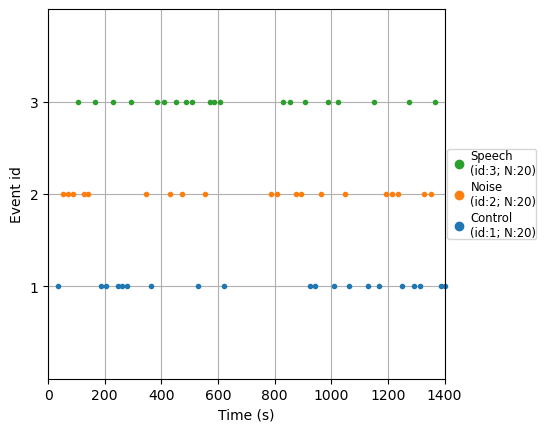

In [155]:
a = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw_haemo.
info['sfreq'])

In [156]:
design_matrix = make_first_level_design_matrix(raw_haemo,
 drift_model=None,
 high_pass=0.01,
 hrf_model='spm',
 stim_dur=5.0)

In [157]:
design_matrix["ShortHbO"] = np.mean(short_chs.copy().pick(
 picks="hbo").get_data(), axis=0)
design_matrix["ShortHbR"] = np.mean(short_chs.copy().pick(
 picks="hbr").get_data(), axis=0)

C:\Users\sarab\AppData\Local\Temp\ipykernel_23660\1622600922.py:2: DeprecationWarning: The parameter "ax" will be removed in 0.13.0 release of Nilearn. Please use the parameter "axes" instead.
  fig = plot_design_matrix(design_matrix, ax=ax1)


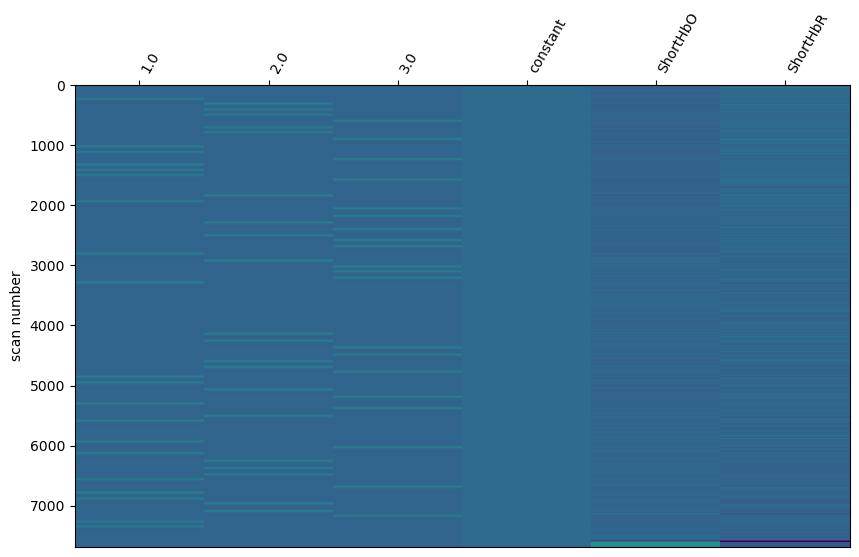

In [158]:
fig, ax1 = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
fig = plot_design_matrix(design_matrix, ax=ax1)

Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]


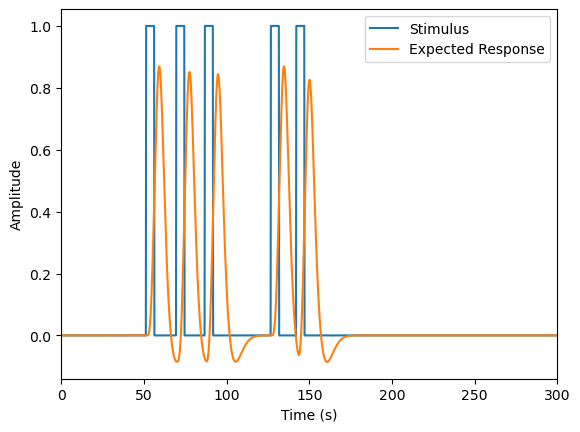

In [159]:
s = mne_nirs.experimental_design.create_boxcar(raw_intensity, stim_dur=5.0)
plt.plot(raw_intensity.times, s[:, 1]) # s[:, 0])--0 means the first trigger, 1␣
#means the second, in this case 0 is the one for clear speech
plt.plot(design_matrix['2.0']) # 
plt.xlim(0, 300)
plt.legend(["Stimulus", "Expected Response"])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show(fig)

<Axes: xlabel='Condition', ylabel='Theta'>

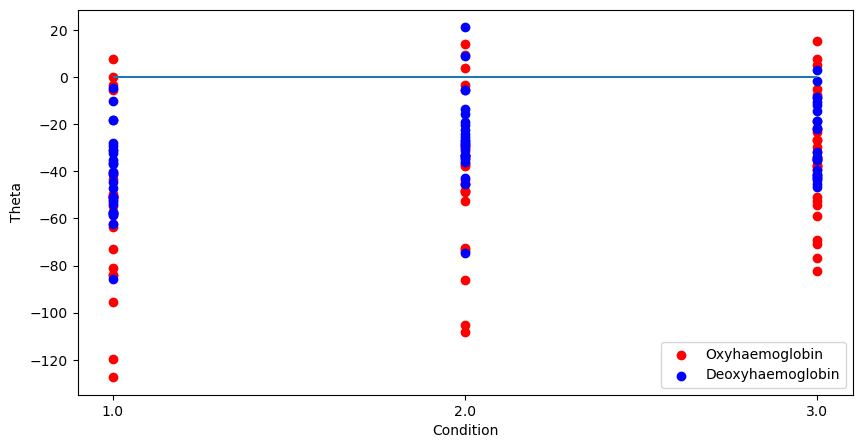

In [160]:
glm_est = run_glm(raw_haemo, design_matrix)
glm_est.scatter()

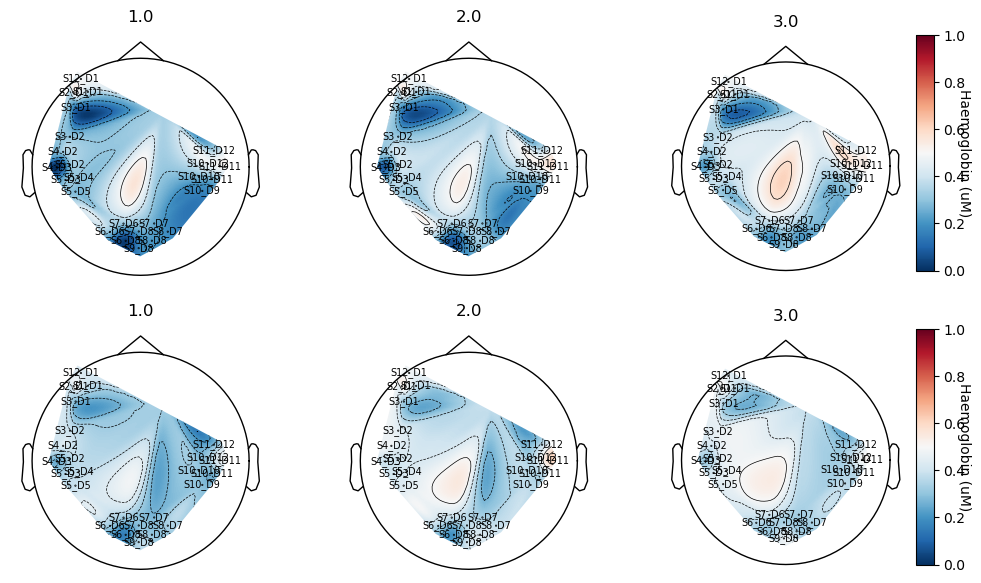

In [161]:
glm_est = run_glm(raw_haemo, design_matrix)
a = glm_est.plot_topo(conditions=['1.0', '2.0', '3.0'])

How to plot subparts

Text(0.5, 1.0, 'Plotted independently')

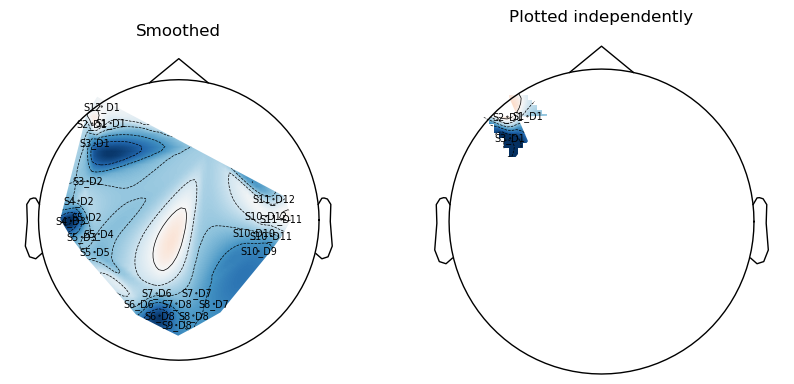

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6),
gridspec_kw=dict(width_ratios=[0.92, 1]))
glm_hbo = glm_est.copy().pick(picks="hbo")
conditions = ['1.0']
glm_hbo.plot_topo(axes=axes[0], colorbar=False, conditions=conditions)
glm_hbo.copy().pick(picks=['S1_D1 hbo','S2_D1 hbo','S3_D1 hbo']).plot_topo(conditions=conditions, axes=axes[1], colorbar=False, vlim=(-80,80))
#glm_hbo.copy().pick(picks=['S9_D8 hbo','S10_D8 hbo','S11_D8 hbo']).plot_topo(conditions=conditions, axes=axes[1], colorbar=False, vlim=(-80,80))

axes[0].set_title("Smoothed")
axes[1].set_title("Plotted independently")

# Auditory Left vs Right

In [178]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import mne_nirs
from mne_nirs.experimental_design import make_first_level_design_matrix
from mne_nirs.statistics import run_glm
from mne_nirs.channels import (get_long_channels,
get_short_channels,
picks_pair_to_idx)
from nilearn.plotting import plot_design_matrix
from mne.preprocessing.nirs import (optical_density,
temporal_derivative_distribution_repair)

In [200]:

datapath = 'subjects/sub-19/ses-01/nirs'

raw_intensity = mne.io.read_raw_nirx(datapath).load_data()

Loading subjects/sub-19/ses-01/nirs
Reading 0 ... 7583  =      0.000 ...  1455.936 secs...


C:\Users\sarab\AppData\Local\Temp\ipykernel_23660\538149921.py:3: RuntimeWarning: Extraction of measurement date from NIRX file failed. This can be caused by files saved in certain locales (currently only ['en_US.utf8', 'de_DE', 'fr_FR', 'it_IT'] supported). Please report this as a github issue. The date is being set to January 1st, 2000, instead of '"21. feb 2025""09:56:13.880"'.
  raw_intensity = mne.io.read_raw_nirx(datapath).load_data()


In [201]:
print(raw_intensity.info["bads"])

[]


In [202]:
# print the channel names
print(raw_intensity.ch_names)

['S1_D1 785', 'S1_D1 830', 'S2_D1 785', 'S2_D1 830', 'S2_D13 785', 'S2_D13 830', 'S3_D1 785', 'S3_D1 830', 'S3_D2 785', 'S3_D2 830', 'S4_D2 785', 'S4_D2 830', 'S4_D3 785', 'S4_D3 830', 'S4_D14 785', 'S4_D14 830', 'S5_D2 785', 'S5_D2 830', 'S5_D3 785', 'S5_D3 830', 'S5_D4 785', 'S5_D4 830', 'S5_D5 785', 'S5_D5 830', 'S5_D15 785', 'S5_D15 830', 'S6_D6 785', 'S6_D6 830', 'S6_D8 785', 'S6_D8 830', 'S6_D16 785', 'S6_D16 830', 'S7_D6 785', 'S7_D6 830', 'S7_D7 785', 'S7_D7 830', 'S7_D8 785', 'S7_D8 830', 'S8_D7 785', 'S8_D7 830', 'S8_D8 785', 'S8_D8 830', 'S8_D17 785', 'S8_D17 830', 'S9_D8 785', 'S9_D8 830', 'S10_D9 785', 'S10_D9 830', 'S10_D10 785', 'S10_D10 830', 'S10_D11 785', 'S10_D11 830', 'S10_D12 785', 'S10_D12 830', 'S10_D18 785', 'S10_D18 830', 'S11_D11 785', 'S11_D11 830', 'S11_D12 785', 'S11_D12 830', 'S11_D19 785', 'S11_D19 830', 'S12_D1 785', 'S12_D1 830', 'S12_D20 785', 'S12_D20 830']


[Text(0.5, 0, 'Scalp Coupling Index'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

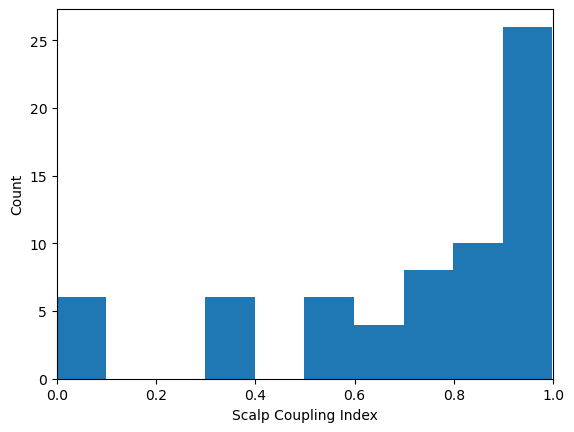

In [203]:
raw_od= mne.preprocessing.nirs.optical_density(raw_intensity)
sci = mne.preprocessing.nirs.scalp_coupling_index(raw_od)
fig, ax = plt.subplots()
ax.hist(sci)
ax.set(xlabel="Scalp Coupling Index", ylabel="Count", xlim=[0, 1])

In [204]:
# Separating the data
l_auditory = raw_intensity.copy().pick_channels(['S4_D14 785', 'S4_D14 830', 'S4_D2 785', 'S4_D2 830','S4_D3 785','S4_D3 830', 'S5_D2 785', 'S5_D2 830', 'S5_D3 785', 'S5_D3 830', 'S5_D4 785', 'S5_D4 830', 'S5_D5 785', 'S5_D5 830', 'S5_D15 785', 'S5_D15 830'])
r_auditory = raw_intensity.copy().pick_channels(['S11_D12 785', 'S11_D12 830','S11_D11 785','S11_D11 830', 'S10_D12 785', 'S10_D12 830', 'S10_D10 785', 'S10_D10 830', 'S10_D11 785', 'S10_D11 830', 'S10_D9 785', 'S10_D9 830', 'S10_D18 785', 'S10_D18 830', 'S11_D19 785', 'S11_D19 830'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [205]:
# Get raw optical dencsity data
l_auditory_raw_od = mne.preprocessing.nirs.optical_density(l_auditory)
r_auditory_raw_od = mne.preprocessing.nirs.optical_density(r_auditory)

[Text(0.5, 0, 'Scalp Coupling Index l'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

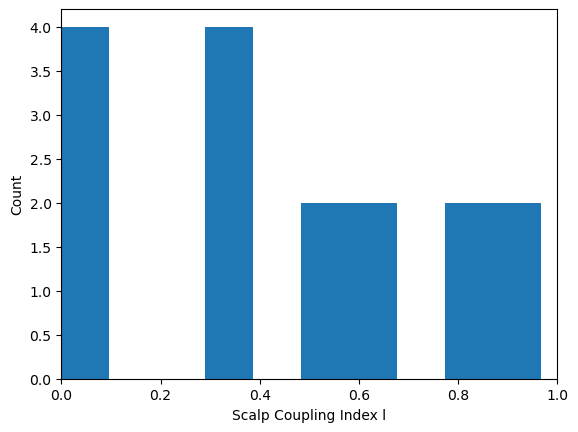

In [206]:
sci_l = mne.preprocessing.nirs.scalp_coupling_index(l_auditory_raw_od)
fig, ax = plt.subplots()
ax.hist(sci_l)
ax.set(xlabel="Scalp Coupling Index l", ylabel="Count", xlim=[0, 1])

[Text(0.5, 0, 'Scalp Coupling Index r'), Text(0, 0.5, 'Count'), (0.0, 1.0)]

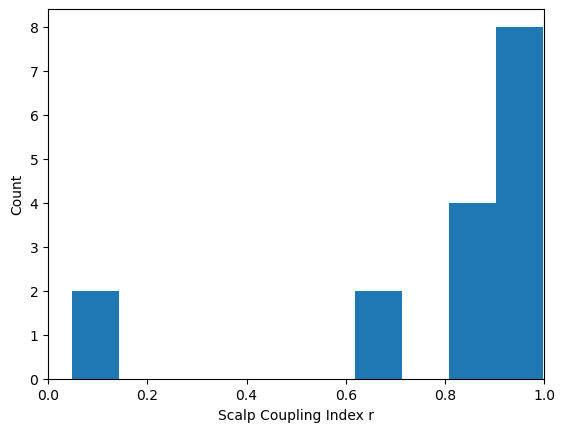

In [207]:
sci_r = mne.preprocessing.nirs.scalp_coupling_index(r_auditory_raw_od)
fig, ax = plt.subplots()
ax.hist(sci_r)
ax.set(xlabel="Scalp Coupling Index r", ylabel="Count", xlim=[0, 1])

In [208]:
# The time window we show in the plot
tmin, tmax = -5, 15

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.21 Hz)
- Filter length: 1719 samples (330.048 s)

Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]
Not setting metadata
60 matching events found
Setting baseline interval to [-4.992000319488021, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 105 original time points ...
0 bad epochs dropped


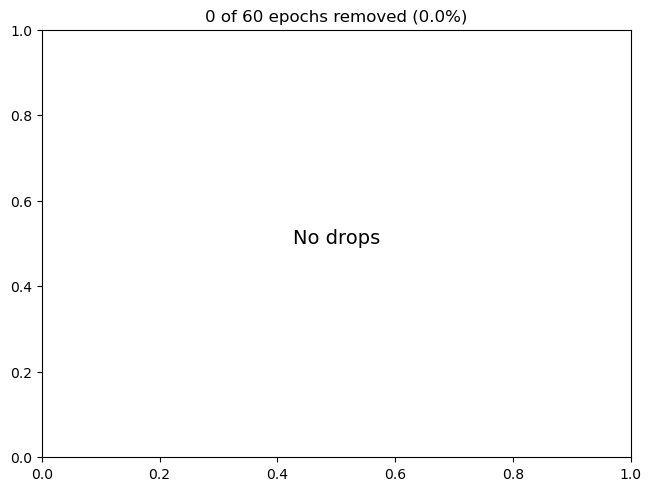

In [218]:
# For left frontal area
reject_criteria = dict(hbo=200e-6)
# Short channel Regression
l_auditory_od_scr_corrected = mne_nirs.signal_enhancement.short_channel_regression(l_auditory_raw_od)
# TDDR
l_auditory_od_corrected =temporal_derivative_distribution_repair(l_auditory_od_scr_corrected)
l_auditory_raw_haemo = mne.preprocessing.nirs.beer_lambert_law(l_auditory_od_corrected, ppf=6.1)
l_auditory_raw_haemo = mne_nirs.channels.get_long_channels(l_auditory_raw_haemo)
# Band-Pass Filter
l_auditory_haemo = l_auditory_raw_haemo.filter(0.01, 0.2, h_trans_bandwidth=0.01,l_trans_bandwidth=0.01)
events, _ = mne.events_from_annotations(l_auditory, event_id={'1.0': 1,'2.0': 2, '3.0': 3})
event_dict = {'Control': 1, 'Noise': 2, 'Speech': 3}
# Baseline correction
epochs_corr_l = mne.Epochs(l_auditory_haemo, events, event_id=event_dict,tmin=tmin, tmax=tmax, reject= reject_criteria, reject_by_annotation=True,proj=True, baseline=(None, 0), preload=True,detrend=None, verbose=True)
epochs_corr_l.plot_drop_log()
evoked_dict_corr_l = {
'Control/HbO': epochs_corr_l['Control'].average(picks='hbo'),
'Control/HbR': epochs_corr_l['Control'].average(picks='hbr'),
#'Noise/HbO': epochs_corr_l['Noise'].average(picks='hbo'),
#'Noise/HbR': epochs_corr_l['Noise'].average(picks='hbr'),
'Speech/HbO': epochs_corr_l['Speech'].average(picks='hbo'),
'Speech/HbR': epochs_corr_l['Speech'].average(picks='hbr')}
# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict_corr_l:
    evoked_dict_corr_l[condition].rename_channels(lambda x: x[:-4])

In [219]:
# For rigth frontal area
#reject_criteria = dict(hbo=100e-6)
# Short channel Regression
r_auditory_od_scr_corrected = mne_nirs.signal_enhancement.short_channel_regression(r_auditory_raw_od)
# TDDR
r_auditory_od_corrected =temporal_derivative_distribution_repair(r_auditory_od_scr_corrected)
r_auditory_raw_haemo = mne.preprocessing.nirs.beer_lambert_law(r_auditory_od_corrected, ppf=6.1)
r_auditory_raw_haemo = mne_nirs.channels.get_long_channels(r_auditory_raw_haemo)
# Band-Pass Filter
r_auditory_haemo = r_auditory_raw_haemo.filter(0.01, 0.2, h_trans_bandwidth=0.01,l_trans_bandwidth=0.01)
events, _ = mne.events_from_annotations(r_auditory, event_id={'1.0': 1,'2.0': 2, '3.0': 3})
event_dict = {'Control': 1, 'Noise': 2, 'Speech': 3}
# Baseline correction
epochs_corr_r = mne.Epochs(r_auditory_haemo, events, event_id=event_dict,tmin=tmin, tmax=tmax, reject=reject_criteria, reject_by_annotation=True,proj=True, baseline=(None, 0), preload=True,detrend=None, verbose=True)
evoked_dict_corr_r = {
'Control/HbO': epochs_corr_r['Control'].average(picks='hbo'),
'Control/HbR': epochs_corr_r['Control'].average(picks='hbr'),
#'Noise/HbO': epochs_corr_r['Noise'].average(picks='hbo'),
#'Noise/HbR': epochs_corr_r['Noise'].average(picks='hbr'),
'Speech/HbO': epochs_corr_r['Speech'].average(picks='hbo'),
'Speech/HbR': epochs_corr_r['Speech'].average(picks='hbr')}
# Rename channels until the encoding of frequency in ch_name is fixed
for condition in evoked_dict_corr_r:
    evoked_dict_corr_r[condition].rename_channels(lambda x: x[:-4])

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.20 Hz
- Upper transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.21 Hz)
- Filter length: 1719 samples (330.048 s)

Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]
Not setting metadata
60 matching events found
Setting baseline interval to [-4.992000319488021, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 105 original time points ...
0 bad epochs dropped


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


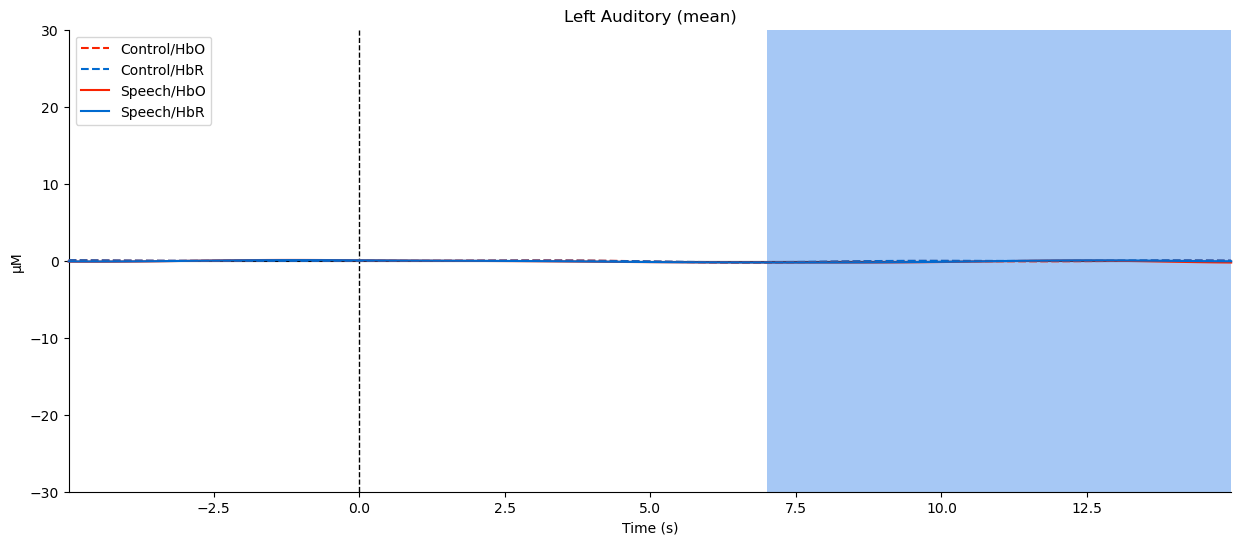

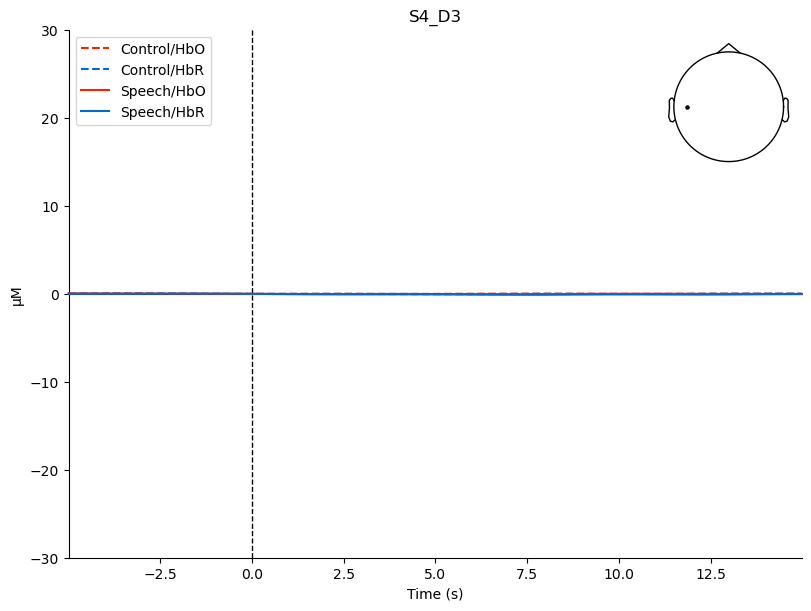

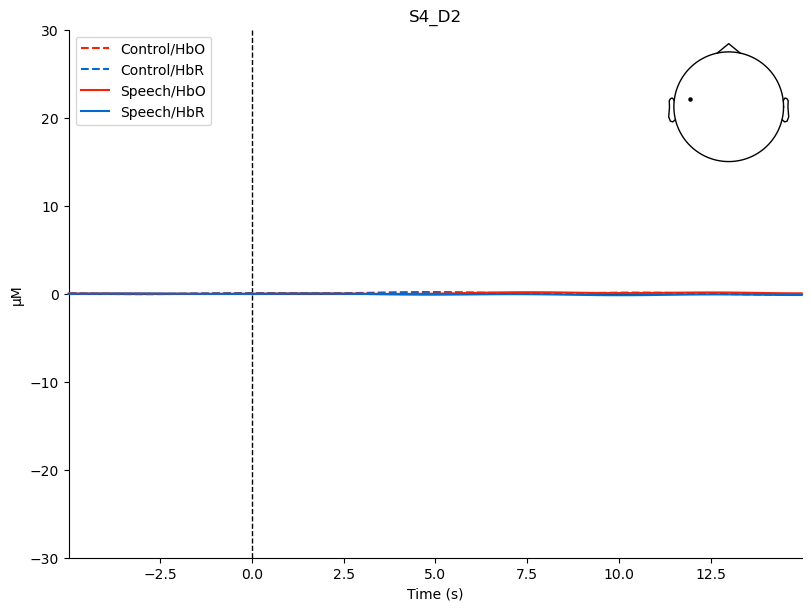

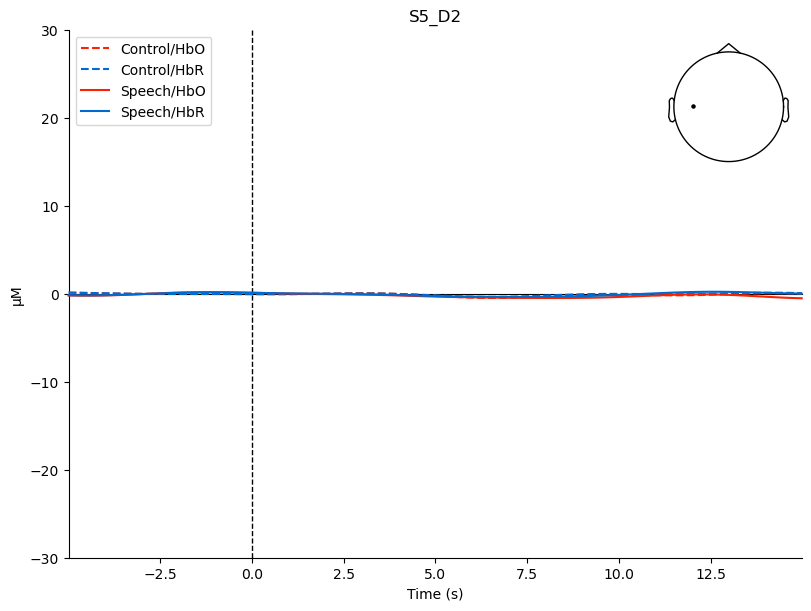

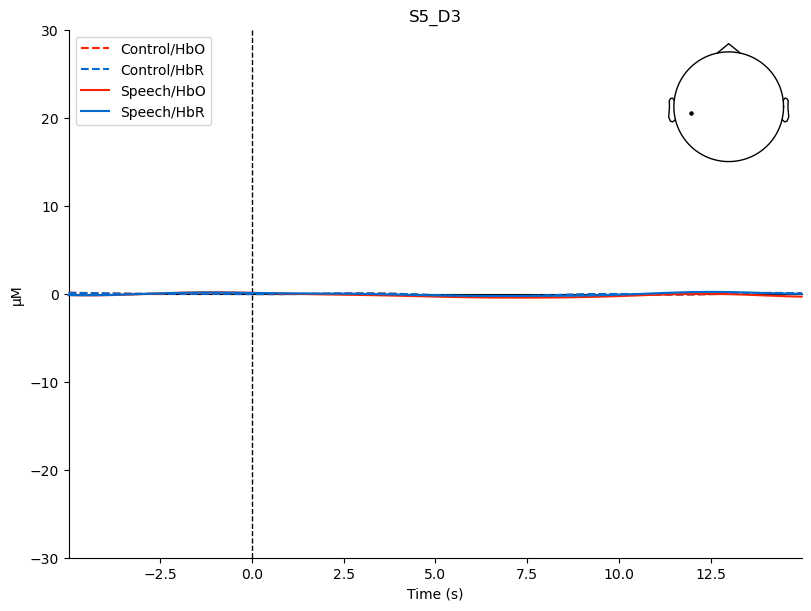

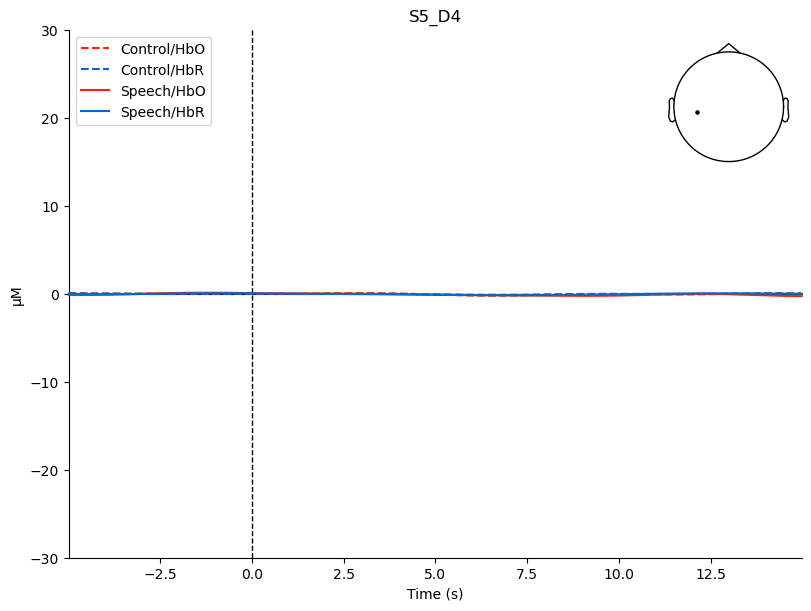

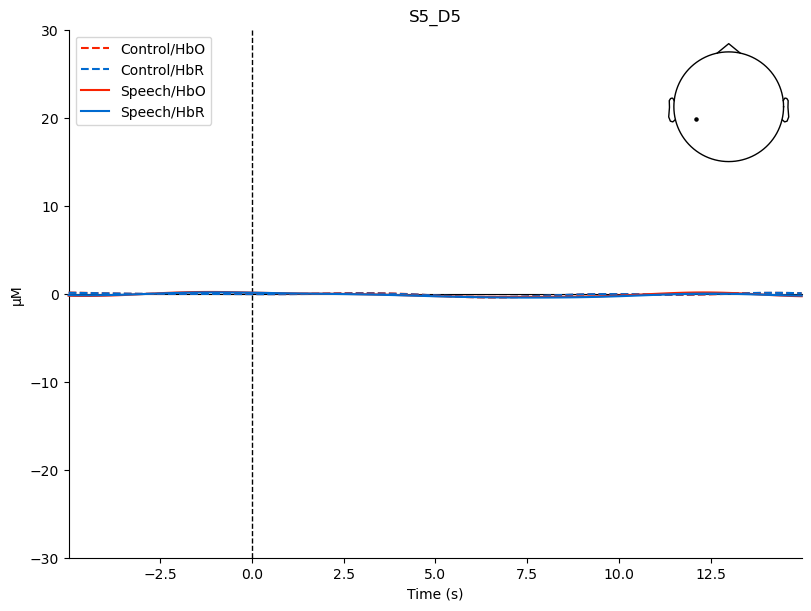

[<Figure size 800x600 with 2 Axes>]

In [220]:
#'S4_D2', 'S4_D3', 'S5_D2', 'S5_D3', 'S5_D4', 'S5_D5'
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
# for showing the interval ,whose data we will use for calculating the LI
t = np.arange(7.0, 21.0, 1)
axes.fill_between(t, 30,-30 , facecolor='#80B1F1', alpha=.7)
color_dict = dict(HbO='#f92301', HbR='#006ad0')
styles_dict = dict(Control=dict(linestyle='dashed'))
mne.viz.plot_compare_evokeds(evoked_dict_corr_l, combine="mean", ci=0.95,
axes=axes, colors=color_dict,
styles=styles_dict,
title = 'Left Auditory',
truncate_xaxis = False,
ylim=dict(hbo=[-30, 30]))
mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S4_D3',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S4_D2',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))
mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S5_D2',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S5_D3',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S5_D4',
colors=color_dict, 
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_l, picks='S5_D5',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


combining channels using "mean"


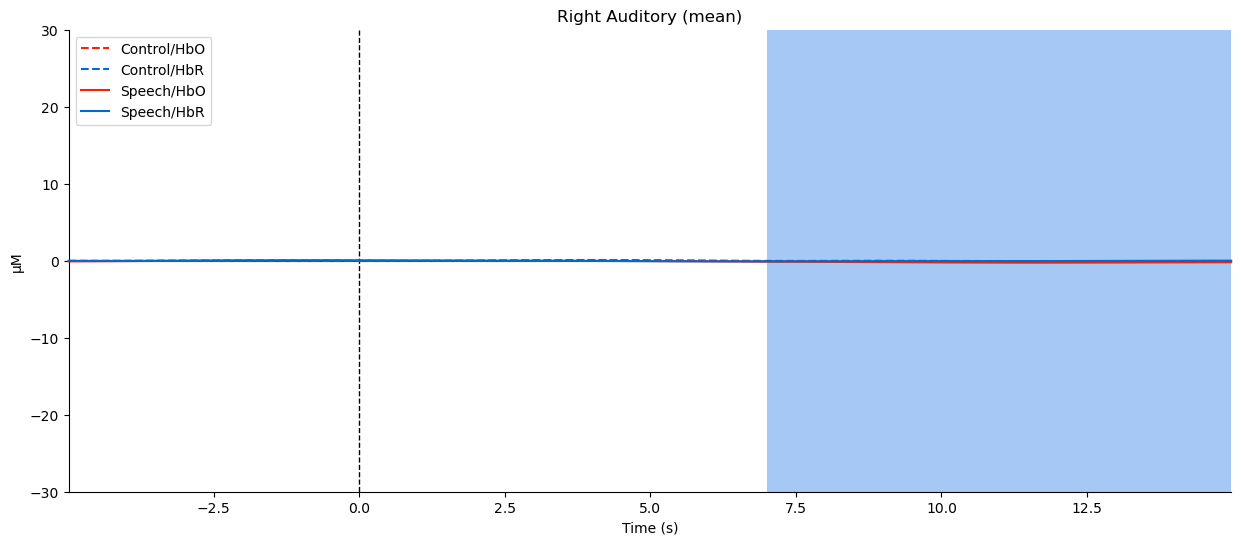

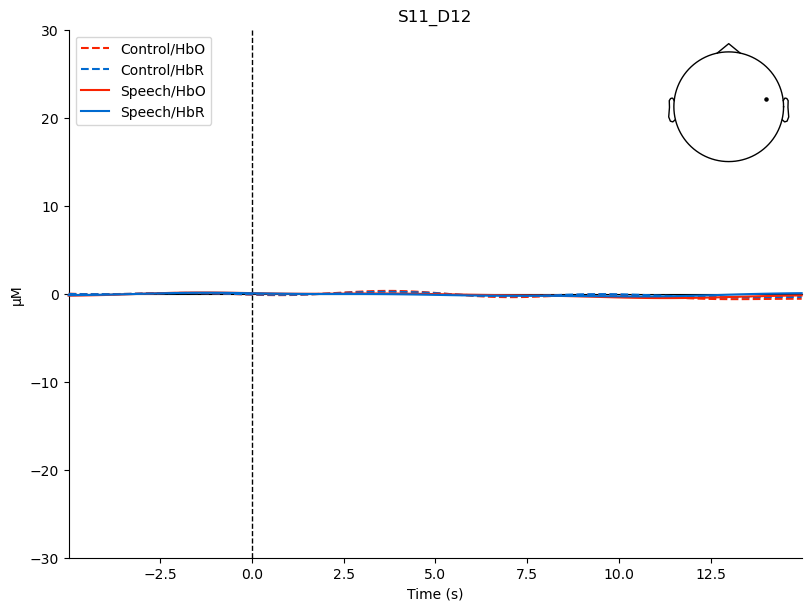

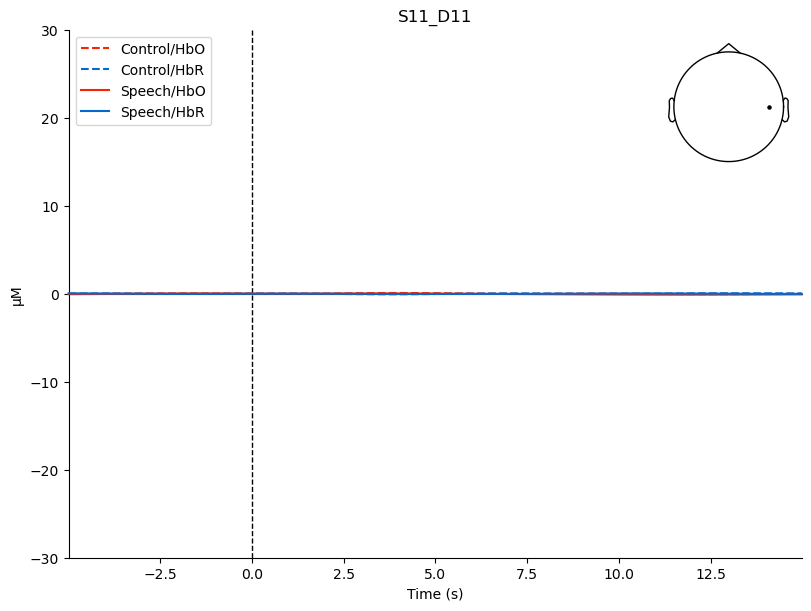

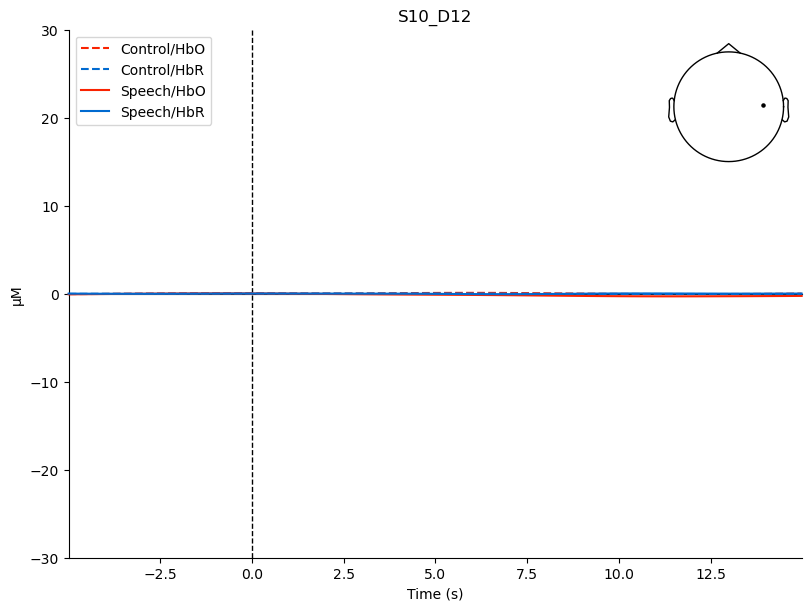

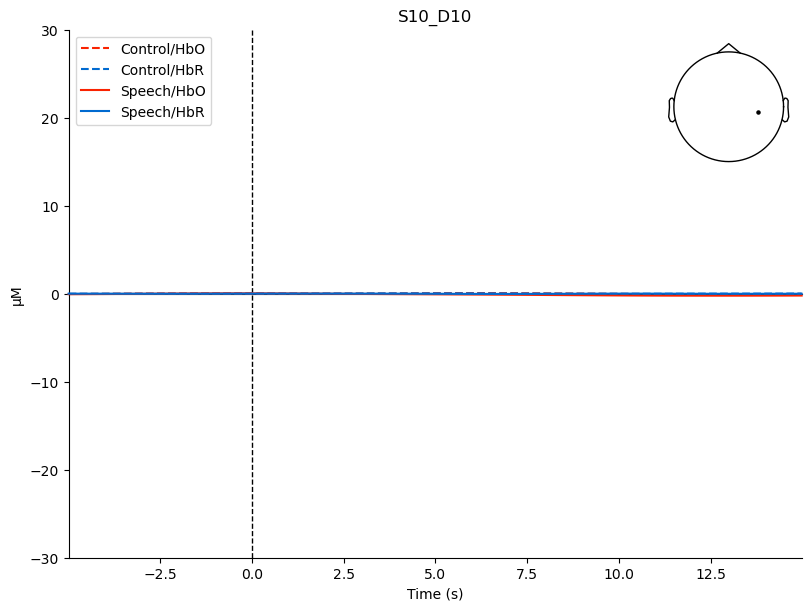

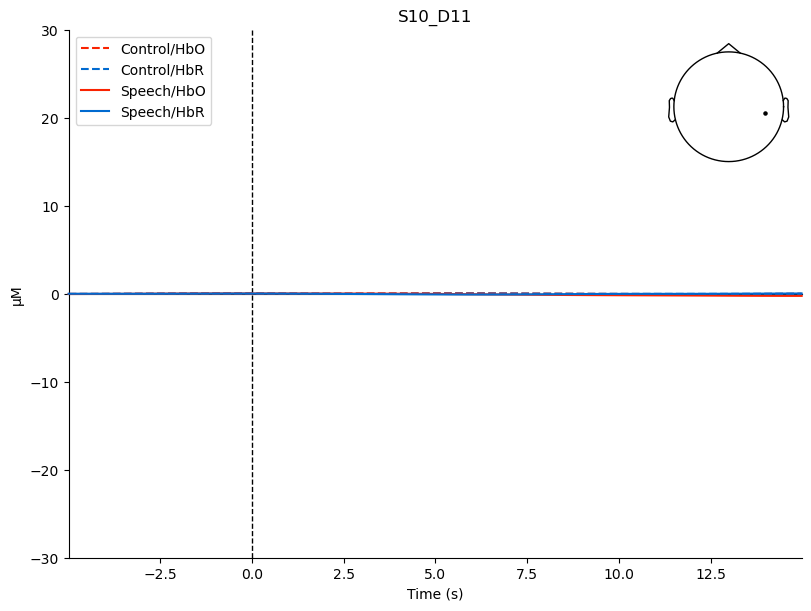

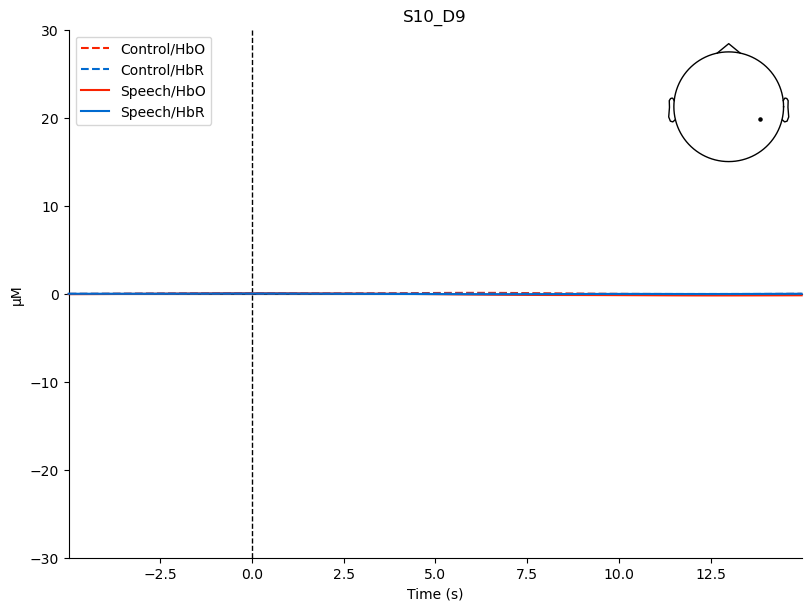

[<Figure size 800x600 with 2 Axes>]

In [221]:
#'S11_D12', 'S11_D11', 'S10_D12', 'S10_D10', 'S10_D11', 'S10_D9'
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
# for showing the interval ,whose data we will use for calculating the LI
t = np.arange(7.0, 21.0, 1)
axes.fill_between(t, 30,-30 , facecolor='#80B1F1', alpha=.7)
color_dict = dict(HbO='#f92301', HbR='#006ad0')
styles_dict = dict(Control=dict(linestyle='dashed'))
mne.viz.plot_compare_evokeds(evoked_dict_corr_r, combine="mean", ci=0.95,
axes=axes, colors=color_dict,
styles=styles_dict,
title = 'Right Auditory',
truncate_xaxis = False,
ylim=dict(hbo=[-30, 30]))
mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S11_D12',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S11_D11',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))
mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S10_D12',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S10_D10',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S10_D11',
colors=color_dict, 
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))

mne.viz.plot_compare_evokeds(evoked_dict_corr_r, picks='S10_D9',
colors=color_dict,
styles=styles_dict,
truncate_xaxis= False,
ylim=dict(hbo=[-30, 30]))


In [222]:
# 'S1_D1'
""" roi_electrode_pairs = {
        "Frontal": ['S12_D1', 'S2_D1', 'S1_D1', 'S3_D1', 'S3_D2'],
        "Auditory_Left": ['S4_D2', 'S4_D3', 'S5_D2', 'S5_D3', 'S5_D4', 'S5_D5'],
        "Auditory_Right": ['S11_D12', 'S11_D11', 'S10_D12', 'S10_D10', 'S10_D11', 'S10_D9'],
        "Visual": ['S7_D6', 'S6_D6', 'S6_D8', 'S9_D8', 'S8_D8', 'S7_D7', 'S8_D7', 'S7_D8']
    } """

' roi_electrode_pairs = {\n        "Frontal": [\'S12_D1\', \'S2_D1\', \'S1_D1\', \'S3_D1\', \'S3_D2\'],\n        "Auditory_Left": [\'S4_D2\', \'S4_D3\', \'S5_D2\', \'S5_D3\', \'S5_D4\', \'S5_D5\'],\n        "Auditory_Right": [\'S11_D12\', \'S11_D11\', \'S10_D12\', \'S10_D10\', \'S10_D11\', \'S10_D9\'],\n        "Visual": [\'S7_D6\', \'S6_D6\', \'S6_D8\', \'S9_D8\', \'S8_D8\', \'S7_D7\', \'S8_D7\', \'S7_D8\']\n    } '